In [2]:
#importing libraries

import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns


In [4]:
#Reading the data

data=pd.read_csv("healthdata.csv")
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Modifying date and time into standard form

data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [7]:
data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
data['sch_weekday']=data['ScheduledDay'].dt.dayofweek
data['app_weekday']=data['AppointmentDay'].dt.dayofweek

In [9]:
#5 is saturday and 6 is sunday

data['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [10]:
data['app_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

In [11]:
#here we get most of the scheduled and  appointments are on weekdays



In [12]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [13]:
#changing the name of some columns
data=data.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMSreceived','No-show':'Noshow'})

In [14]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,sch_weekday,app_weekday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,1,1
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,1,1
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,2,1
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,2,1


In [15]:
#dropping some columns which have no significance
data.drop(['PatientId','AppointmentID','Neighbourhood'],axis=1,inplace=True)

In [16]:
data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1


In [17]:
data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,sch_weekday,app_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


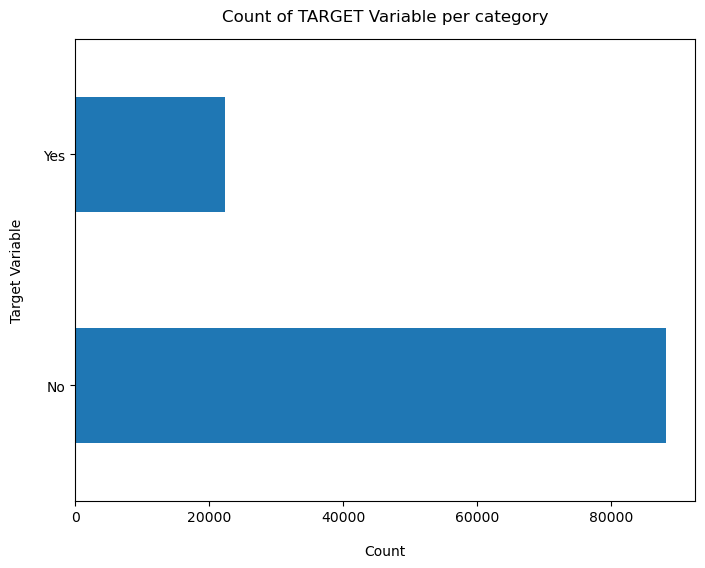

In [18]:
data['Noshow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [20]:
#Checking whether data cointain missed values or not
missing_percent=data.isnull().mean()*100

In [21]:
missing_percent

Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Scholarship       0.0
Hypertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handicap          0.0
SMSreceived       0.0
Noshow            0.0
sch_weekday       0.0
app_weekday       0.0
dtype: float64

Here there is no missing values

# Data Cleaning

In [22]:
new_data=data.copy()

In [23]:
new_data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1


In [24]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSreceived     110527 non-null  int64         
 10  Noshow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int64         
 12  app_weekday     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


As we have null datas,no need for data cleaning 

In [25]:
#Finding maximum tenure

print(new_data['Age'].max())

115


In [26]:
#Grouping age to age group

labels =["{0}-{1}".format(i,i+20) for i in range (1,118,20)]

new_data['age_group']=pd.cut(new_data.Age, range (1,130,20),labels=labels,right=False)

In [27]:
new_data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,sch_weekday,app_weekday,age_group
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4,61-81
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4,41-61
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4,61-81
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4,1-21
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4,41-61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1,41-61
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1,41-61
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1,21-41
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1,21-41


In [28]:
new_data.drop(['Age'],axis=1,inplace=True)

In [29]:
new_data

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,sch_weekday,app_weekday,age_group
0,F,2016-04-29,2016-04-29,0,1,0,0,0,0,No,4,4,61-81
1,M,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,41-61
2,F,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,61-81
3,F,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,1-21
4,F,2016-04-29,2016-04-29,0,1,1,0,0,0,No,4,4,41-61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,0,0,0,0,0,1,No,1,1,41-61
110523,F,2016-05-03,2016-06-07,0,0,0,0,0,1,No,1,1,41-61
110524,F,2016-04-27,2016-06-07,0,0,0,0,0,1,No,2,1,21-41
110525,F,2016-04-27,2016-06-07,0,0,0,0,0,1,No,2,1,21-41


# Data Exploration

In [30]:
list(new_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSreceived',
 'Noshow',
 'sch_weekday',
 'app_weekday',
 'age_group']

In [43]:
#converting categorical variable to numeriacal variable

new_data['Noshow'] = np.where(new_data.Noshow == 'Yes',1,0)

In [46]:
new_data_dummies=pd.get_dummies(new_data)

In [47]:
new_data_dummies

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow,sch_weekday,app_weekday,Gender_F,Gender_M,age_group_1-21,age_group_21-41,age_group_41-61,age_group_61-81,age_group_81-101,age_group_101-121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2016-05-03,2016-06-07,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0
110523,2016-05-03,2016-06-07,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0
110524,2016-04-27,2016-06-07,0,0,0,0,0,1,0,2,1,1,0,0,1,0,0,0,0
110525,2016-04-27,2016-06-07,0,0,0,0,0,1,0,2,1,1,0,0,1,0,0,0,0


In [50]:
#Finding Correlation

new_data_dummies.corr()['Noshow']

C:\Users\meree\AppData\Local\Temp\ipykernel_22408\2865975012.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_data_dummies.corr()['Noshow']


Scholarship          0.029135
Hypertension        -0.035701
Diabetes            -0.015180
Alcoholism          -0.000196
Handicap            -0.006076
SMSreceived          0.126431
Noshow               1.000000
sch_weekday          0.006020
app_weekday          0.001165
Gender_F             0.004119
Gender_M            -0.004119
age_group_1-21       0.038234
age_group_21-41      0.041228
age_group_41-61     -0.024475
age_group_61-81     -0.054950
age_group_81-101    -0.015441
age_group_101-121    0.004493
Name: Noshow, dtype: float64

C:\Users\meree\AppData\Local\Temp\ipykernel_22408\3112575147.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data_dummies.corr(),cmap="rocket_r")


<Axes: >

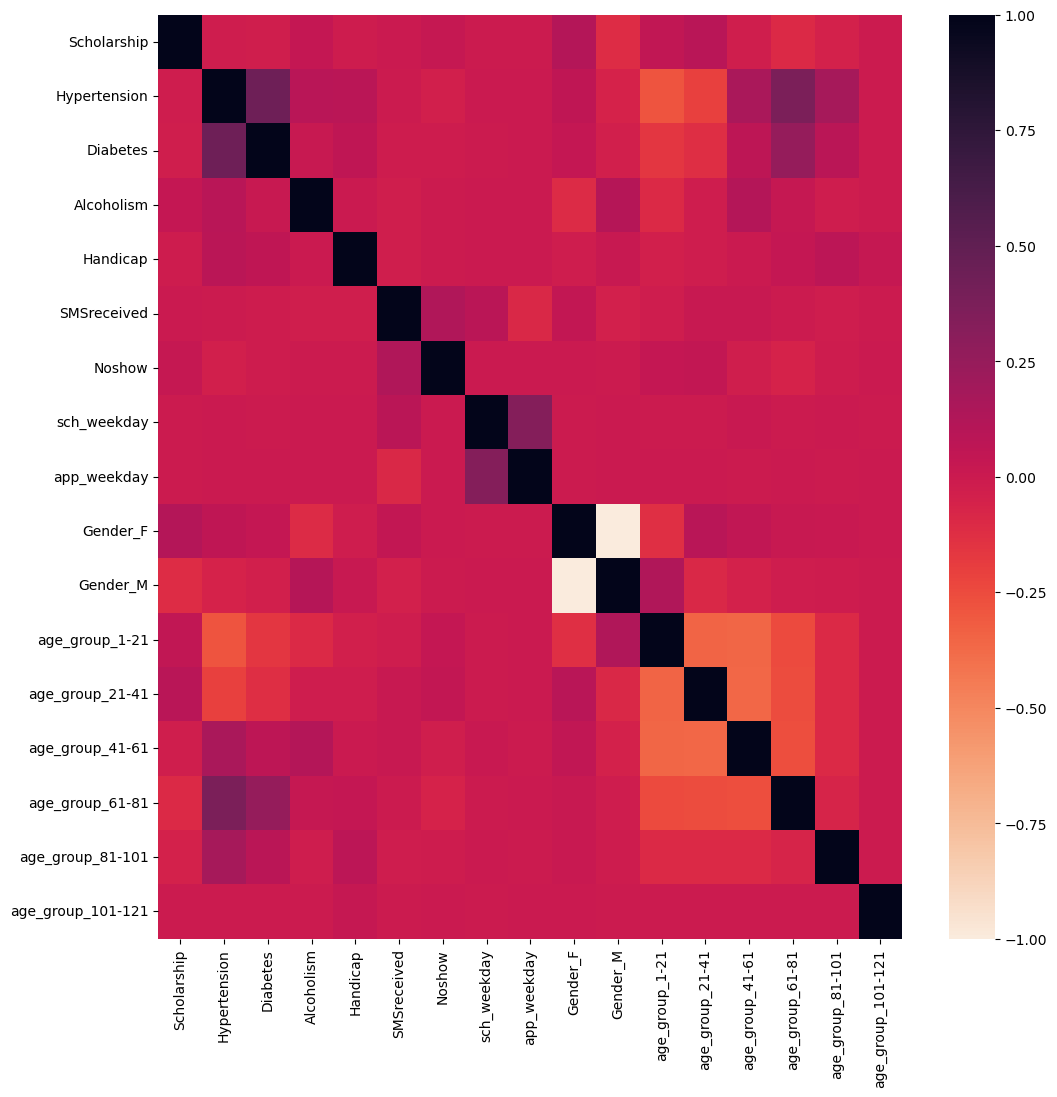

In [58]:
plt.figure(figsize=(12,12))
sns.heatmap(new_data_dummies.corr(),cmap="rocket_r")

C:\Users\meree\AppData\Local\Temp\ipykernel_22408\1320123310.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_data_dummies.corr()['Noshow'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

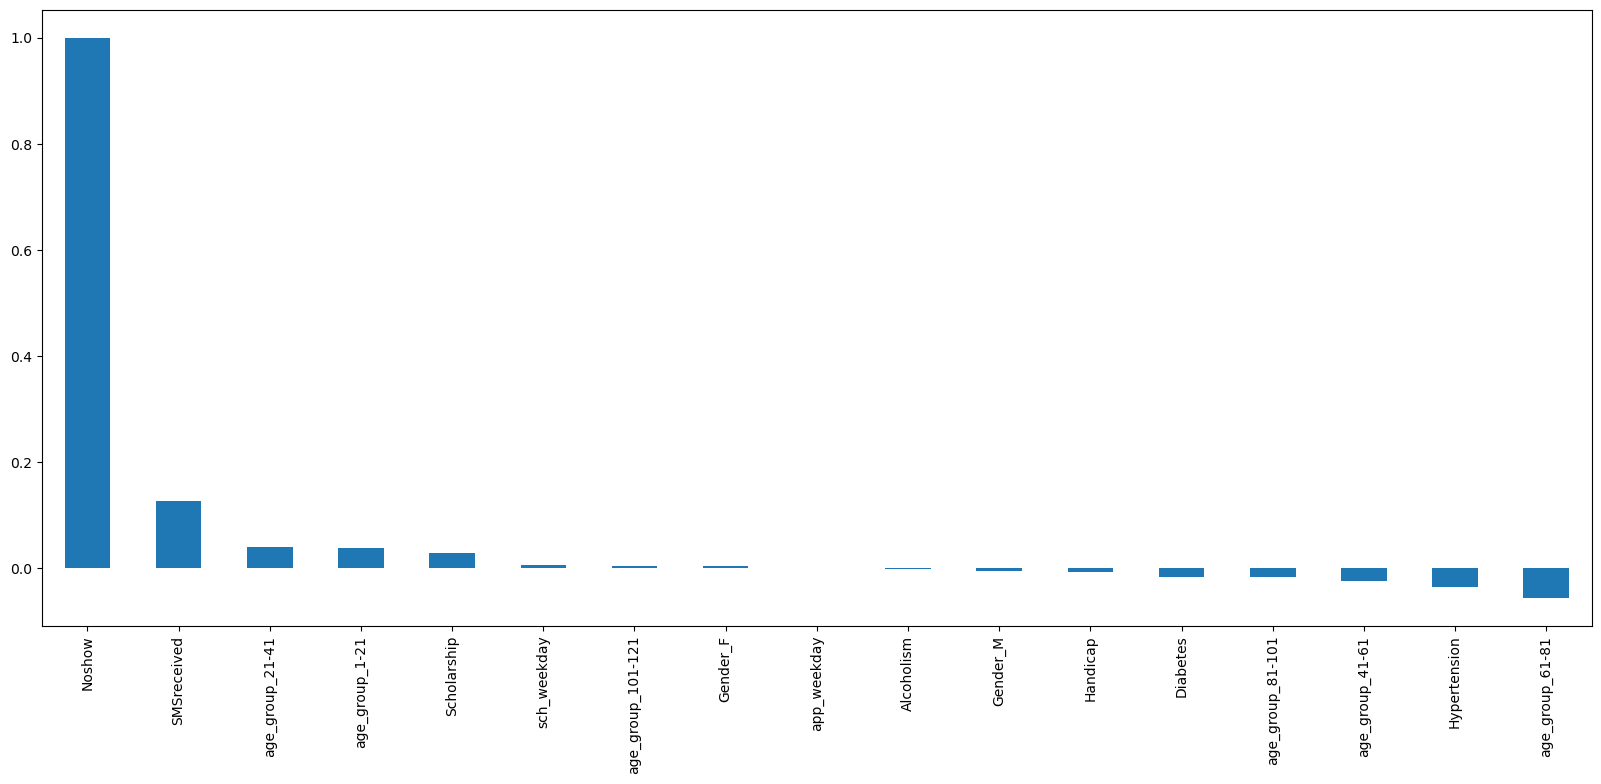

In [61]:
plt.figure(figsize=(20,8))
new_data_dummies.corr()['Noshow'].sort_values(ascending = False).plot(kind='bar')